# Rutherford trajectory simulation

This notebook should show the solution of the equation of motion for a charged $\alpha$ particle, scattered on a spatially fixed charged gold nucleus. This resembles to be Rutherford Scattering or Coulomb Scattering in general.



# Equation of motion of the $\alpha$ particle


Force on the $\alpha$ particle at a distance $r$ frokm the gold atom

\begin{equation}
F=\frac{1}{4\pi \epsilon_{0}}\frac{qQ}{r^2}
\end{equation}

Split up the position into $x$ and $y$ coordinates with the equation of motion

\begin{equation}
\ddot{x}=\frac{kQq}{m}\frac{x}{(x^2+y^2)^{3/2}}
\end{equation}

and

\begin{equation}
\ddot{y}=\frac{kQq}{m}\frac{y}{(x^2+y^2)^{3/2}}
\end{equation}

and the force constant for Coulomb interactions

\begin{equation}
k=\frac{1}{4\pi \epsilon_{0}}
\end{equation}



In [1]:
# import some required modules
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
# this defines the equation of motions in odeint style
def rutherford(state,t):
    g0=state[1] # x velocity
    g1=k*Q*q*state[0]/m/(state[0]**2+state[2]**2)**(3/2) # x-acceleration
    g2=state[3] # y velocity
    g3=k*Q*q*state[2]/m/(state[0]**2+state[2]**2)**(3/2) # y-acceleration
    return np.array([g0,g1,g2,g3])

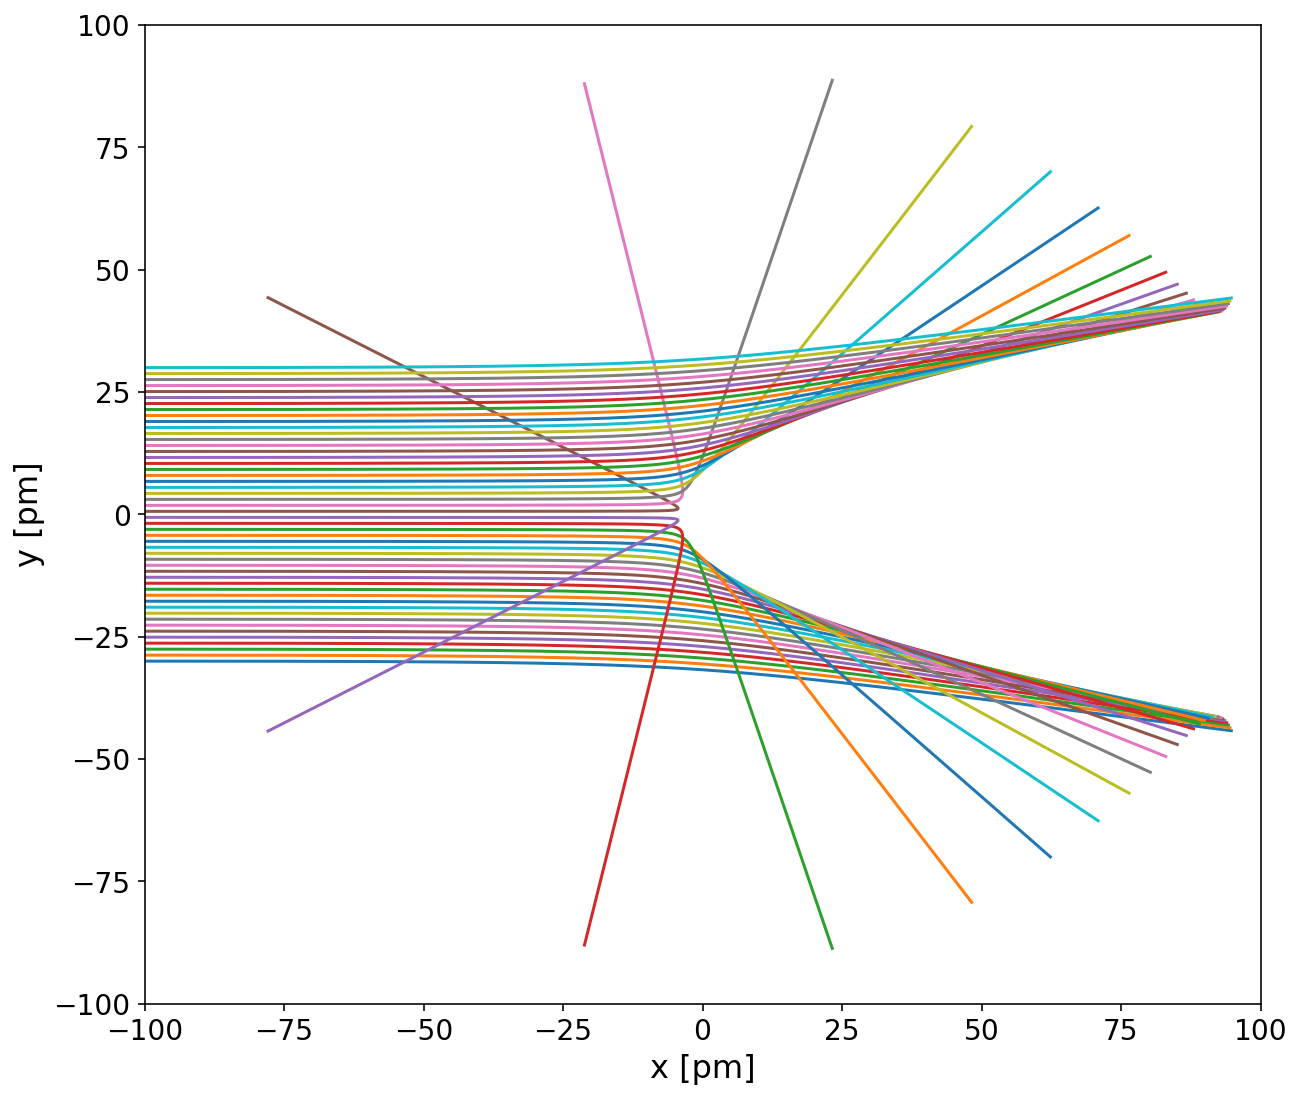

In [5]:
#define some fundamental constants
epsilon_0=8.654e-12 # C^2 N^-1 m^-2
k=1/(4*np.pi*epsilon_0) # force constant
m=6.64465723e-27 # mass of the alpha particle
e=1.6021766208e-19 # elementary charge
q=2*e # charge of the alpha particle
Q=79*e # charge of the gold atom
rga=67.5e-12 # size of the gold atom

#define the initial state
state=np.zeros(4)
state[0]=-100e-12 # x starting position in m
state[1]=1.55e6    # x velocity in m/s, 5MeV
state[2]=-10e-12  # y starting position in m
state[3]=0        # y velocity in m/s

plt.figure(figsize=(10,9))

time=np.abs(2*state[0]/state[1])  # total time to be simulated (in seconds), adopt to x-range and velocity
N=100000   # number of timesteps for the simulation
t=np.linspace(0,time,N) # times at which the amplitudes shall be calculated

# range of impact parameters b
b_range=np.linspace(-30e-12,30e-12,50)

#solve the differential equations
for b in b_range:    
    state[2]=b
    answer=odeint(rutherford,state,t)    
    xpos=answer[:,0]
    ypos=answer[:,2]
    plt.plot(xpos*1e12,ypos*1e12)

plt.xlabel('x [pm]', fontsize=16)
plt.ylabel('y [pm]',fontsize=16)
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.tick_params(labelsize=14)
plt.show()

# Plum pudding model by Thomson

The plum pudding model by Thomson assumes homogeneously distributed positive and negative charges in atom. 

For the plum pudding model by Thomson, the equations of motion of the $\alpha$ particle look

\begin{equation}
\ddot{x}=\frac{kQq}{m}\frac{x}{r_{ga}^3}
\end{equation}

and

\begin{equation}
\ddot{y}=\frac{kQq}{m}\frac{y}{r_{ga}^3}
\end{equation}

where $r_{ga}$ is the radius of the gold atom.


In [6]:
def plumpudding(state,t):
    g0=state[1] # x velocity
    if np.sqrt(state[0]**2+state[2]**2)<rga:
        g1=k*Q*q*state[0]/m/rga**3 # x-acceleration
        g3=k*Q*q*state[2]/m/rga**3 # y-acceleration
    else:
        #g1=k*Q*q*state[0]/m/(state[0]**2+state[2]**2)**(3/2) # x-acceleration
        #g3=k*Q*q*state[2]/m/(state[0]**2+state[2]**2)**(3/2) # y-acceleration
        g1=0
        g3=0
    g2=state[3] # y velocity

    return np.array([g0,g1,g2,g3])

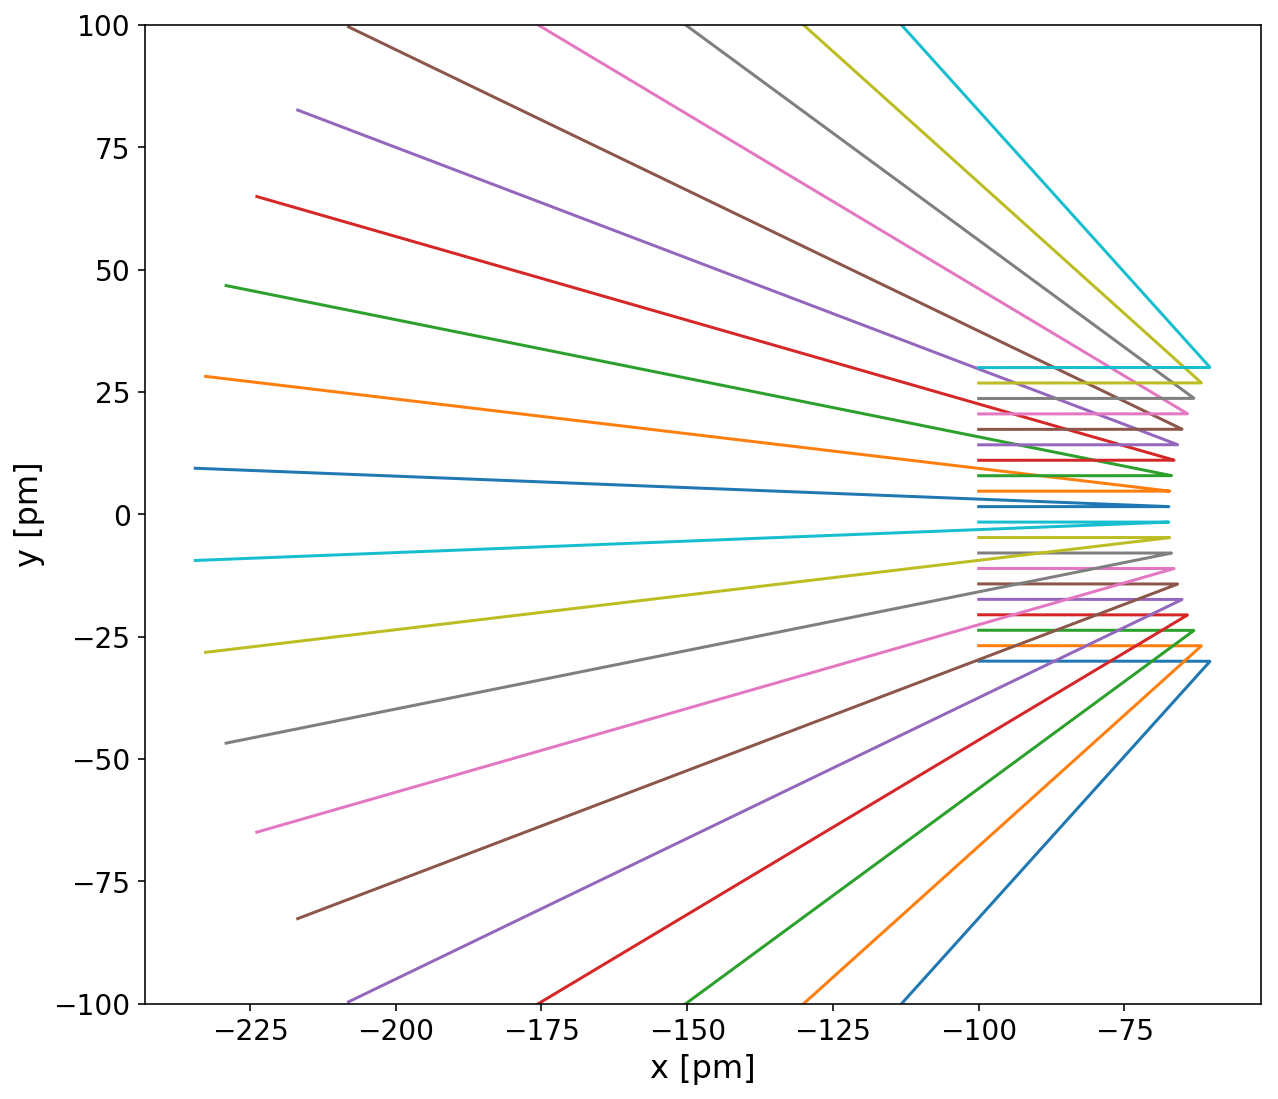

In [7]:
#define some fundamental constants
epsilon_0=8.654e-12 # C^2 N^-1 m^-2
k=1/(4*np.pi*epsilon_0) # force constant
m=6.64465723e-27 # mass of the alpha particle
e=1.6021766208e-19 # elementary charge
q=2*e # charge of the alpha particle
Q=79*e # charge of the gold atom
rga=67.5e-12 # size of the gold atom in m

#define the initial state
state=np.zeros(4)
state[0]=-100e-12 # x starting position in m
state[1]=1.55e4    # x velocity in m/s, 5MeV
state[2]=-10e-12  # y starting position in m
state[3]=0        # y velocity in m/s

plt.figure(figsize=(10,9))

time=np.abs(2*state[0]/state[1])  # total time to be simulated (in seconds), adopt to x-range and velocity
N=100000   # number of timesteps for the simulation
t=np.linspace(0,time,N) # times at which the amplitudes shall be calculated

# range of impact parameters b
b_range=np.linspace(-30e-12,30e-12,20)

#solve the differential equations
for b in b_range:    
    state[2]=b
    state[0]=-100e-12
    answer=odeint(plumpudding,state,t)    
    xpos=answer[:,0]
    ypos=answer[:,2]
    plt.plot(xpos*1e12,ypos*1e12)

plt.xlabel('x [pm]', fontsize=16)
plt.ylabel('y [pm]',fontsize=16)
plt.ylim(-100,100)
plt.tick_params(labelsize=14)
plt.show()